Привет Юрий :) Меня зовут Семенюк Артём, я буду проверять твой проект. Предлагаю общаться на "ты",
если так не очень комфортно, то перейдём на "Вы". 
Несколько слов о ревью. Оно может содержать 3 типа комментариев, различающихся цветом:

<div class="alert alert-success">
✅Зелёный: хорошие решения и верные выводы, которые могут быть применены в будущем, интересные подходы
</div>


<div class="alert alert-warning">
⚠️Жёлтый: не критические замечания тех моментов, которые можно реализовать по-другому или оптимировать (исправлять их сейчас не обязательно, но стоит прокомментировать) 
</div>


<div class="alert alert-danger">
❌Красный: аспекты заданий, требующие твоего непосредственного внимания (при их исправлении
проект будет принят)
</div>


Предлагаю работать над проектом в диалоге. Если что-то меняешь в проекте следуя моим рекомендациям, то
выделяй, пожалуйста, свои комментарии, отличным от моих цветом. И так же большая просьба
не изменять и не удалять мои комментарии. Так будет проще отслеживать изменения в проекте
и это ускорит повторную проверку :)

<div class="alert alert-info" role="alert">
  Артём, привет! Спасибо за работу, сейчас поправлю все ошибки!
</div>

# Проект "А/В-тесты"

_для локальной работы_

https://drive.google.com/file/d/1Hskt8ns_2uaWjBHujSDsn5aLBKrchWBk/view?usp=sharing

https://drive.google.com/file/d/1pmp-AjnUMO2yfdbnxTXzSGPOgVGo3ZpM/view?usp=sharing

https://drive.google.com/file/d/1WwPmms3mOMzIUM8DLTAtxysyW9G4nNRi/view?usp=sharing

## Введение

Наш интернет-магазин приготовил список гипотез для для увеличения выручки. Нам предоставили файл с гипотезами и два файла с данными о покупках и визитах, разбитые на группы А и В.

Задачи исследования — приоритизировать гипотезы, проанализировать результат А/В-теста.

## Импорт библиотек

In [1]:
# импортируем библиотеки numpy, pandas и модуль scipy.stats библиотеки scipy
import numpy as np
import pandas as pd
import scipy.stats as stats

# импортируем библиотеку datetime для работы с датами
import datetime as dt
from datetime import datetime, date
from datetime import timedelta

# Задаем некоторые опции библиотеки pandas, которые
# настраивают вывод
pd.set_option('display.max_columns', 12)
pd.set_option('display.max_rows', 12)
pd.options.display.max_colwidth = 100

# импортируем matplotlib для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline

## Загрузка данных и знакомство с ними

In [2]:
# для локальной работы

'''! gdown --id 1Hskt8ns_2uaWjBHujSDsn5aLBKrchWBk
! gdown --id 1pmp-AjnUMO2yfdbnxTXzSGPOgVGo3ZpM
! gdown --id 1WwPmms3mOMzIUM8DLTAtxysyW9G4nNRi'''

'! gdown --id 1Hskt8ns_2uaWjBHujSDsn5aLBKrchWBk\n! gdown --id 1pmp-AjnUMO2yfdbnxTXzSGPOgVGo3ZpM\n! gdown --id 1WwPmms3mOMzIUM8DLTAtxysyW9G4nNRi'

In [3]:
# для локальной работы

try:
  hypothesis = pd.read_csv('/content/hypothesis.csv')
  orders = pd.read_csv('/content/orders.csv')
  visitors = pd.read_csv('/content/visitors.csv')

# для работы в среде ЯП

except:
  hypothesis = pd.read_csv('/datasets/hypothesis.csv')
  orders = pd.read_csv('/datasets/orders.csv')
  visitors = pd.read_csv('/datasets/visitors.csv')

In [4]:
# смотрим  на файл hypothesis

hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [5]:
# смотрим  на файл orders

orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
# для удобства дальнейшей работы переименуем столбцы датафрейма orders, 
# названия столбцов пропишем = названиям столбцов в рабочих формулах

orders.columns = ['orderId', 'userId', 'date', 'revenue', 'group']

In [7]:
# смотрим  на файл visitors

visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


## Подготовка данных к работе

### Изменение регистра столбцов

In [8]:
# названия столбцов в hypothesis к нижнему регистру

hypothesis.columns = hypothesis.columns.str.lower()

### Поиск пропущенных значений

In [9]:
hypothesis.isna().mean()

hypothesis    0.0
reach         0.0
impact        0.0
confidence    0.0
efforts       0.0
dtype: float64

In [10]:
orders.isna().mean()

orderId    0.0
userId     0.0
date       0.0
revenue    0.0
group      0.0
dtype: float64

In [11]:
visitors.isna().mean()

date        0.0
group       0.0
visitors    0.0
dtype: float64

### Поиск явных дубликатов

In [12]:
hypothesis.duplicated().sum()

0

In [13]:
orders.duplicated().sum()

0

In [14]:
visitors.duplicated().sum()

0

### Определение временного интервала тестирования, проверка количества пользователей в группах

#### Проверим даты

Проверим совпадение минимальной и максимальной дат в _orders_ и _visiters_.

In [15]:
orders[:1]

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B


In [16]:
# посмотрим минимальную и максимальную дату в таблице orders

orders['date'].agg(['min', 'max'])

min    2019-08-01
max    2019-08-31
Name: date, dtype: object

In [17]:
# сделаем то же самое для таблицы visitors

visitors['date'].agg(['min', 'max'])

min    2019-08-01
max    2019-08-31
Name: date, dtype: object

Даты совпадают в обоих датасетах. Дата начала теста 2019-08-01, конца 2019-08-31. Идем дальше.

#### Проверим общее количество пользователей, количество пользователей в группах

In [18]:
# начнем с группы А

orders[orders['group'] == 'A']['userId'].nunique()

503

In [19]:
# теперь В

orders[orders['group'] == 'B']['userId'].nunique()

586

In [20]:
# всего пользователей, без разбивки на группы

orders['userId'].nunique()

1031

Хьюстон, у нас очевидные проблемы — 58 пользователей состоят в обеих группах. Этих пользователей нужно найти и удалить, они искажают анализ А/В-теста

In [21]:
# найдем этих "двойных" пользователей и запишем в переменную a_b_users

a_b_users = np.intersect1d(orders.query('group == "A"')['userId'].unique(),
                                  orders.query('group == "B"')['userId'].unique()) 
a_b_users

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [22]:
# проверим количество

len(a_b_users)

58

Все верно, 58 пользователей. Исключим их из датасета _orders_.

In [23]:
orders = orders[~orders['userId'].isin(a_b_users)]

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера 2:</b> Действительно, в данных присутствуют пользователи из обеих групп. Но их не обязательно удалять, хоть процент таких пользователей и небольшой, это может изменить результаты исследования :)
</div>

In [24]:
# проверяем

orders['userId'].nunique()

973

In [25]:
# снова группы А

orders[orders['group'] == 'A']['userId'].nunique()

445

In [26]:
# теперь В

orders[orders['group'] == 'B']['userId'].nunique()

528

Теперь все верно, пользователей с двойной группы нет. Общее количество пользвоателей совпадает с суммой пользователей по группам.

### Вывод по подготовке данных

Данные чистые, без дубликатов и пропусков. Работаем дальше.

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера:</b> Отличная работа по ознакомлению с данными. Очень здорово, что не забыл сделать проверку на дубли и пустые значения :)
</div>

## Приоритизация гипотез

Есть 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами _Reach, Impact, Confidence, Effort_.

Задача применить фреймворки ICE и RICE для приоритизации гипотез и выбрать потенциально прибыльные гипотезы для бизнеса. Требуется определить, на какую приоритизацию ориентироваться в первую очередь — ICE или RICE.

<div class="alert alert-info" role="alert">
  Поправил
</div>

<div class="alert alert-block alert-warning"> ⚠️ <b>Комментарий ревьюера:</b> Здесь хорошо бы добавить небольшое описание, что будет исследоваться </div>

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера:</b> Всё здорово :)
</div>

Посмотрим на файл с гипотезами полностью

In [27]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<div class="alert alert-info" role="alert">
  Поправил
</div>

<div class="alert alert-block alert-warning"> ⚠️ <b>Комментарий ревьюера:</b> Всё отлично, но было бы здорово вывести названия гипотез целиком, например так: pd.options.display.max_colwidth = 100 </div>

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера 2:</b> отлично, теперь можно ознакомиться со всеми гипотезами исходя из таблицы :)
</div>

In [28]:
print(f'Всего {len(hypothesis)} гипотез')

Всего 9 гипотез


Задача выбрать потенциально самые прибыльные гипотезы

### ICE

Вспомним, как считается ICE:

ICE = (Impact x Confidence)/ Efforts 

In [29]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence']\
                  / hypothesis['efforts']
hypothesis['ICE'] = hypothesis['ICE'].round(2)
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


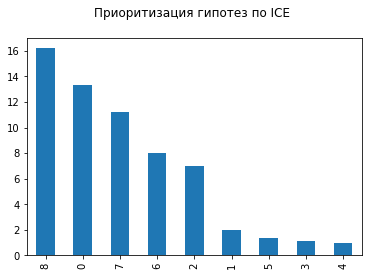

In [30]:
hypothesis['ICE'].sort_values(ascending=False).plot(kind='bar');
plt.title('Приоритизация гипотез по ICE \n');

In [31]:
# посмотрим топ-4 гипотезы по ICE

top_4_ICE = hypothesis[['hypothesis', 'ICE']]\
           .sort_values(by='ICE', ascending=False).index[:4]
top_4_ICE

Int64Index([8, 0, 7, 6], dtype='int64')

### Вывод по ICE

По методу _ICE_ наиболее интересны гипотезы [8, 0, 7, 6].

### RICE

RICE отличается от ICE добавлением еще одного компонента — охват (англ. reach). Формула для расчета RICE:

RICE = (Reach x Impact x Confidence)/ Efforts 

In [32]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact']\
                   * hypothesis['confidence'] / hypothesis['efforts']
hypothesis['ICE'] = hypothesis['ICE'].round(2)
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Text(0.5, 1.0, 'Приоритизация гипотез по RICE \n')

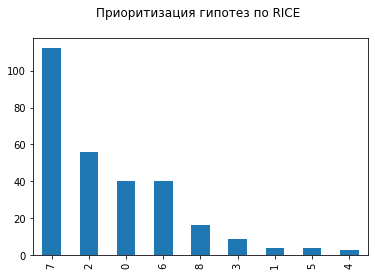

In [33]:
hypothesis['RICE'].sort_values(ascending=False).plot(kind='bar');
plt.title('Приоритизация гипотез по RICE \n')

In [34]:
# топ-4 гипотезы по RICE

top_4_RICE = hypothesis[['hypothesis', 'RICE']]\
           .sort_values(by='RICE', ascending=False).index[:4]
top_4_RICE

Int64Index([7, 2, 0, 6], dtype='int64')

### Вывод по RICE

По методу _RICE_ наиболее интересны гипотезы [7, 2, 0, 6].

### Вывод по приоритизации гипотез по _ICE_ и _RICE_

Список потенциально прибыльных гипоз по _RICE_ поменялся из-за введения параметра _Reach_. Лидер по методу _ICE_, гипотеза №8, не попала в Топ-4 по методу _RICE_.RICE более информативен, учитывает охват пользователей, ориентируемся на него. 

Три из четырех топовых гипотез по _ICE_ попадает в список топовых гипотез по _RICE_, обе метрики приоритизируют гипотезы на 75% одинаково. Наш финальный список выглядит так:

**[7, 2, 0, 6]**

Пятая гипотеза по методу _RICE_ выглядит в 2,5 раза менее интересной, ее и следующие за ней гипотезы считаем не интересными для бизнеса.



<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера:</b> Хорошая работа по приоритизации гипотез. Хотел порекомендовать округлить значения ice и rice до 2х знаков :)
</div>

<div class="alert alert-info" role="alert">
  Артём, поправил
</div>

## Анализ A/B-теста

Наша компания провела А/В-тест, наша задача проанализировать его результаты. Есть результаты о покупках и визитах. Данные лежат в файлах _orders_ и _visits_. После анализа результатов нужно принять решение — остановить ли тест или продолжить? Успешный тест или нет?

<div class="alert alert-block alert-warning"> ⚠️ <b>Комментарий ревьюера:</b> Здесь тоже хорошо бы добавить небольшое описание какие задачи будут решаться, чем они могут быть полезны бизнесу и т.п. </div>

<div class="alert alert-info" role="alert">
  Добавил
</div>

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера 2:</b> Здорово, теперь сформулированы основные цели данного исследования :)
</div>

### График кумулятивной выручки по группам. Сделайте выводы и предположения

In [35]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.\
           apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], \
           orders['group'] == x['group'])].\
           agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', \
'userId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.\
apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], \
                                        visitors['group'] == x['group'])]\
      .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
      .sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated\
.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      23      19   142779       719
1  2019-08-01     B      17      17    59758       713
2  2019-08-02     A      42      36   234381      1338
3  2019-08-02     B      40      39   221801      1294
4  2019-08-03     A      66      60   346854      1845


<div class="alert alert-block alert-danger">❌ <b>Комментарий ревьюера:</b> Перед началом исследования, хорошо бы оценить ещё раз исходные данные, а именно определить даты начала и конца тестирования, какое кол-во пользователей входит в группы, сколько всего групп, есть ли пересекающиеся пользователи, кол-во уникальных пользователей (этот анализ можно включить выше в пункт подготовки данных)
</div>

<div class="alert alert-info" role="alert">
  Добавил в п. 4.4
</div>

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера 2:</b> Теперь исследование и предобработка исходных данных более полные :)
</div>

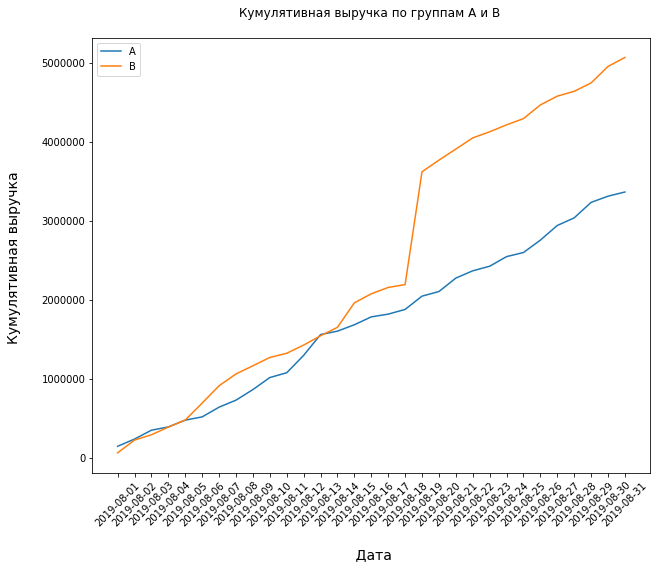

In [36]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# меняем размер графика и убираем экспотенциальный формат по оси Y
plt.figure(figsize=(10, 8))
plt.ticklabel_format(style='plain')

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', );

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B');

plt.title('Кумулятивная выручка по группам А и В \n')
plt.xlabel('\n Дата', fontsize=14)
plt.ylabel('Кумулятивная выручка \n', fontsize=14)
plt.xticks(rotation = 45)
plt.legend();


Выручка равномерно увеличивается на протяжении всего теста. Выручка по группе В делает резкий скачок, по группе А тоже есть несколько точек роста. Это либо появление очень дорогих заказов, либо резкое увеличение количества заказов

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера:</b> Всё верно, большой скачок может быть связан с наличием больших заказов :)
</div>
<div class="alert alert-block alert-danger">❌ <b>Комментарий ревьюера:</b> Но график не совсем информативный. Не очень ясно, что отклыдывается по оси х и по оси у, также не хватает заголовка. Для наглядности можно увеличить его размер (это касается и графиков ниже)
</div>

<div class="alert alert-info" role="alert">
  Артём, по графикам все замечания убрал, дополнил всеми параметрами.
</div>

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера 2:</b> Супер, графики преобразились :)
</div>

### График кумулятивного среднего чека по группам

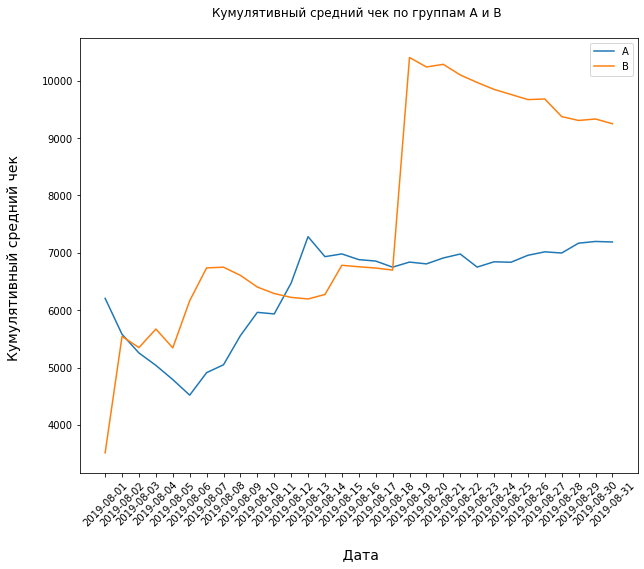

In [37]:
# Построим графики среднего чека по группам — 
# разделим кумулятивную выручку на кумулятивное число заказов:

# меняем размер графика и убираем экспотенциальный формат по оси Y
plt.figure(figsize=(10, 8))
plt.ticklabel_format(style='plain')

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']\
         /cumulativeRevenueA['orders'], label='A');
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']\
         /cumulativeRevenueB['orders'], label='B');

plt.title('Кумулятивный средний чек по группам А и В \n')
plt.xlabel('\n Дата', fontsize=14)
plt.ylabel('Кумулятивный средний чек \n', fontsize=14)
plt.xticks(rotation = 45)
plt.legend();

### Вывод по кумулятивному среднему чеку

Средний чек группы А делает несколько резких скачков в начале теста и нормализуется с середины теста. Возможно, были крупные заказы в стартовом периоде теста.

Для группы В размер среднего чека носит неравномерный характер на протяжении всего теста. Несколько взлетов и падений на старте. Резкий скачок в середине теста и падение к концу.

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера:</b> Действительно график среднего чека для  группы В "скачет", можно предположить что это проиходит из-за наличия ольших заказов :)
</div>

### График относительного изменения кумулятивного среднего чека группы B к группе A

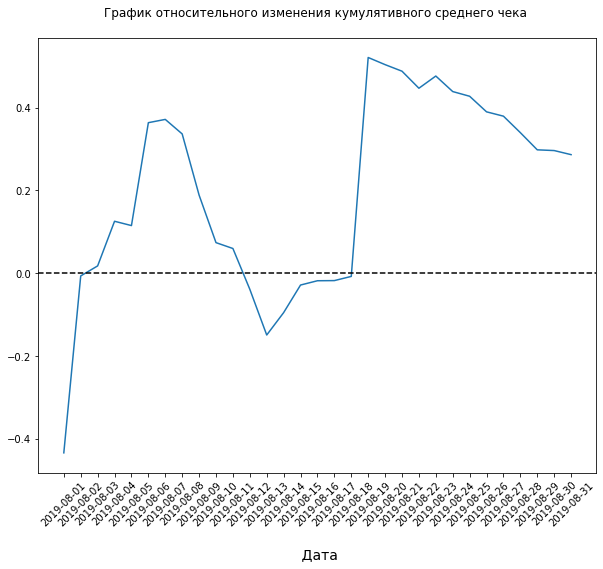

In [38]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, \
              left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# меняем размер графика
plt.figure(figsize=(10, 8))


# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']\
                                          /mergedCumulativeRevenue['ordersB'])\
    /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека \n');
plt.xlabel('\n Дата', fontsize=14);
plt.xticks(rotation = 45);

В нескольких местах график делает скачки — в эти моменты различие между средними чеками групп А и В резко меняется. Возможно, в данных есть выбросы, отвечающие за резкие скачки среднего чек.

### Вывод по графику относительного изменения кумулятивного среднего чека

По такому "скачущему" графику тяжело сделать какие-то выводы, кроме того, что в данных, скорее всего, есть аномалии.

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера:</b> Скорее всего выбросыдостаточно сильно влияют на график :)
</div>

### График кумулятивной конверсии

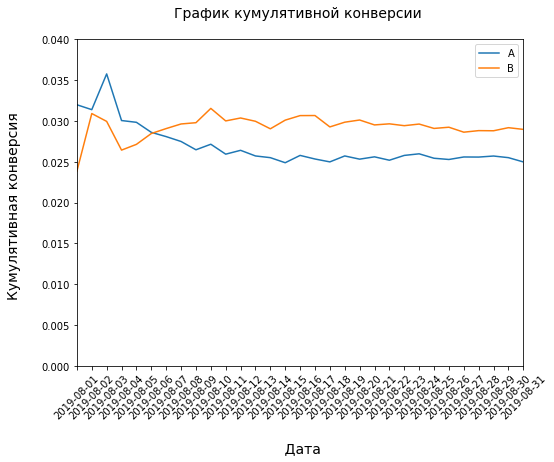

In [39]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']


# меняем размер графика и убираем экспотенциальный формат по оси Y
plt.figure(figsize=(8, 6))
plt.ticklabel_format(style='plain')

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0, 0.04])



plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']\
         /cumulativeRevenueA['orders'], label='A');
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']\
         /cumulativeRevenueB['orders'], label='B');

plt.title('График кумулятивной конверсии \n', fontsize=14)
plt.xlabel('\n Дата', fontsize=14)
plt.ylabel('Кумулятивная конверсия \n', fontsize=14)
plt.xticks(rotation = 45);

Конверсия по обеим группа колебалась в первой половине теста, начиная с середины конверсия для А и В выровнялась. Конверсия для В к концу теста стабильно выше таковой для А на 0.005

### Вывод по графику кумулятивной конверсии

Куумулятивная конверсия группы В практически с самого начала теста выше таковой по группе А.

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера:</b> Всё верно, конверсия группы В больше конверсии группы А :)
</div>

### График относительного изменения кумулятивной конверсии группы B к группе A

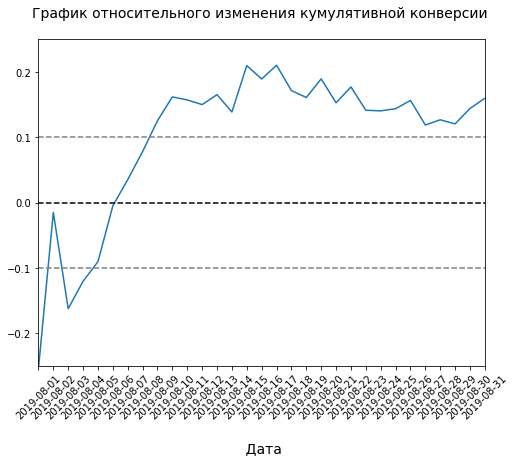

In [40]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date',\
       how='left', suffixes=['A', 'B'])

plt.figure(figsize=(8, 6))

plt.plot(mergedCumulativeConversions['date'], \
         mergedCumulativeConversions['conversionB']\
         /mergedCumulativeConversions['conversionA']-1,\
         label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.25, 0.25])

plt.title('График относительного изменения кумулятивной конверсии \n', fontsize=14)
plt.xlabel('\n Дата', fontsize=14)
plt.xticks(rotation = 45);

В начале теста кумулятивная конверсия В "проваливается", но затем быстро выходит в плюс. Положительное значение прироста конверсии гр. В к таковой для гр. А остается до конца теста.

### Вывод по графику относительного изменения кумулятивной конверсии

Коверсия гр. В в начале теста проигрывала, но на 5-й день сравнялась, а потом вырвалась вперед. Конверсия гр. В больше таковой для группы А на минимум 10-15%. 

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера:</b> Всё верно, также можно добавить, что в начале теста группа В проигрывала группе А, после чего вырвалась вперёд :)
</div>

<div class="alert alert-info" role="alert">
  Поправил цифру!
</div>

### Точечный график количества заказов по пользователям

In [41]:
ordersByUsers = orders.groupby('userId', as_index=False).\
                  agg({'orderId':'nunique'})
ordersByUsers.columns = ['userId', 'orders']   
ordersByUsers.sort_values(by='orders', ascending=False).head()              

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


Text(0.5, 1.0, 'Точечный график количества заказов \n')

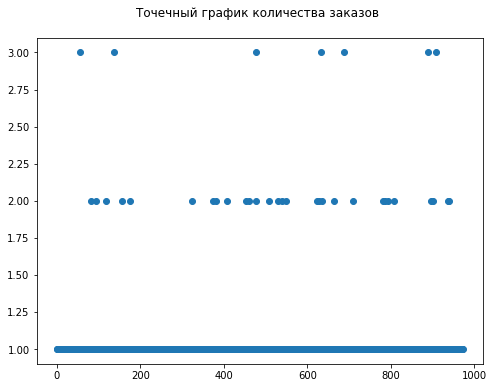

In [42]:
# построим точечный график распределения заказов по пользователям

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(8,6))
plt.scatter(x_values, ordersByUsers['orders']);
plt.title('Точечный график количества заказов \n')

In [43]:
# всего пользователей

print(f'всего {len(ordersByUsers)} пользователей')

всего 973 пользователей


In [44]:
# сколько пользователей делают 1 заказ

ordersByUsers.query('orders == 1').count()

userId    937
orders    937
dtype: int64

In [45]:
# сколько пользователей делают 2 заказа

ordersByUsers.query('orders == 2').count()

userId    29
orders    29
dtype: int64

In [46]:
# полльзователи делают один или два заказа. Посчитаем, сколько пользователей 
# превышают это количество

ordersByUsers.query('orders > 2').count()

userId    7
orders    7
dtype: int64

In [47]:
# доля пользователей с 3 и более заказами

len(ordersByUsers.query('orders > 2')) / len(ordersByUsers)

0.007194244604316547

### Вывод по заказам на пользователя

В основном пользователи делают 1 заказ (96%), значительно меньше 2 заказа (3%). 0.7% пользователей совершают 3  заказа 

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера:</b> Всё верно, большинство пользователей делаю 1 заказ, но  2-4 заказа делают достаточно много пользователей (исходя из графика) :)
</div>
<div class="alert alert-block alert-warning"> ⚠️ <b>Комментарий ревьюера:</b> Если в выводе приводишь процентные значения, то было бы хорошо привести соответствующие расчёты </div>

<div class="alert alert-block alert-warning"> ⚠️ <b>Комментарий ревьюера 2:</b> Т.к. ты удалил часть пользователей, которые присутствовали в обеих группах, то результаты немного изменились. Следует поправить выводы, уточнив корректные значения (это касается и выводов ниже) </div>

<div class="alert alert-info" role="alert">
  Изменил цифры.
</div>

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера 3:</b> Всё корректно :)
</div>

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя

In [48]:
# посчитаем выборочные перцентили количества заказов на одного пользователя

print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 1. 2.]


Не более 5% оформляли более 2 заказов, данные подтверждают наши выводы по графику. Примем 2 за границу количества заказов. Остальных пользователей с **бОльшим** количеством заказов уберем в дальнейшем как аномалии.

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера:</b> Верное решение принять 2 заказа за границу аномальных заказов  :)
</div>

### Точечный график стоимостей заказов

In [49]:
# отсортируем датафрейм по полю revenue, посмотрим максимальные значения 
# в столбце

orders.sort_values(by='revenue', ascending=False).head()

,orderId,userId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A


Был заказ на 1,3 млн, это определенно аномалия. Для сравнения посмотрим на медиану и среднее

In [50]:
orders['revenue'].agg(['median', 'mean'])

median    2955.000000
mean      8300.814961
Name: revenue, dtype: float64

Из-за аномально больших значений медиана в 2,5 раза меньше среднего. Построим элементарную гистограмму по этому полю, оценим распределение по сумма заказов

<AxesSubplot:ylabel='Frequency'>

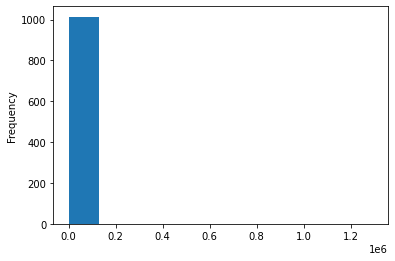

In [51]:
orders['revenue'].plot(kind='hist')

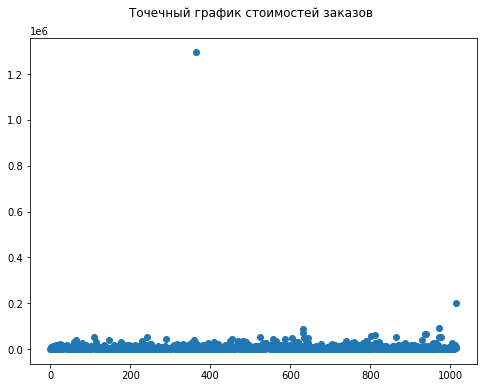

In [52]:
# не очень информативно, поэтому построим точечную диаграмму

x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(8,6))
plt.title('Точечный график стоимостей заказов \n')
plt.scatter(x_values, orders['revenue']) 



На скаттере хорошо видно "великана" в 1,2кк. Заказы в основном меньше 100.000

### 95-й и 99-й перцентили стоимости заказов

Посмотрим на 90, 95 и 99 перцентили

In [53]:
np.percentile(orders['revenue'], [90, 95, 99])

array([17990., 26785., 53904.])

По перцентилям видно — всего 5% заказов стоили дороже 28.000. Таких заказов 60 штук.

In [54]:
# посмотрим на 97.5 перцентиль

np.percentile(orders['revenue'], [90, 95, 97.5])

array([17990., 26785., 37400.])

2,5% заказов дороже 37.400. Их мы в дальнейшем и будем считать аномальными.

_Делать срез по 95 перцентилю считаю слишком большой потерей данных. Заказы на скаттере лежат плотно, убираем лишь аномально большие 30 заказов, с остальным работаем._

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера:</b> Хорошее решение выбрать в качестве границы 97.5 перцентиль. Но выбрать 95й также не является ошибкой :)
</div>

### Статистическая значимость различий в конверсии между группами по «сырым» данным

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. 

Н0: различий в конверсии между группами нет. 
H1: различия в конверсии между группами есть. 

Уровень статистической значимости α зададим 0.05

Подготовим данные.

In [55]:
visitors['date'] = visitors['date'].map(
                   lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,...,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,...,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,...,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,...,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,...,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,...,89,475648,756,707,3318,3280


<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера:</b> Рекомендую для вывода использовать метод display, а не print. Так таблица будет отображаться в привычном виде :)
</div>

<div class="alert alert-info" role="alert">
  Сделал display
</div>

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера 3:</b> Здорово, теперь таблица стала нагляднее :)
</div>

Посчитаем статистическую значимость различия в конверсии между группами. Создадим переменные _ordersByUsersA_ и _ordersByUsersB_ со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов

In [56]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные _sampleA_ и *sampleB*, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [57]:
sampleA = pd.concat([ordersByUsersA['orders'],\
          pd.Series(0, index=np.arange(data['visitorsPerDateA']\
          .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],\
          pd.Series(0, index=np.arange(data['visitorsPerDateB']\
          .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [58]:
print("P-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

P-value = 0.011


P-value меньше уровня значимости 0.05. Отвергаем нулевую гипотезу и считаем, что между конверсиям по группам А и В есть статистически значимая разница.

Выведем относительный прирост конверсии группы B = конверсия группы B / (конверсия группы A - 1)

In [59]:
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.160


Прирост конверсия по группе В составил 16%

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера:</b> Всё верно, конверсия В больше конверсии А на 14%:)
</div>

<div class="alert alert-block alert-warning"> ⚠️ <b>Комментарий ревьюера 2:</b> Уже не 13.8%</div>

<div class="alert alert-info" role="alert">
  Внес верные данные
</div>

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Н0: различий в среднем чеке между группами нет. 
Н1: различия в среднем чеке между группами есть.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию _mannwhitneyu()_ данные о выручке с заказов.

In [60]:
print('P-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']\
                  ['revenue'], orders[orders['group']=='B']['revenue'])[1]))

P-value = 0.829


P-value больше уровня значимости, нулевую гипотезу не отвергаем, статистически значимой разницы между средними чеками нет

Посмотрим на относительное изменение по среднему чеку

In [61]:
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue']\
                      .mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.287


Средний чек группы В на 28.7% больше чека группы А

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера:</b> Всё верно, между группами нет статистически значимого различия по среднему чеку по "сырым" данным, несмотря на относительную разницу почти в 26% :)
</div>

### Вывод по статистической значимости в "сырых" данных

При работе с "сырыми" данными между конверсиями тестируемых групп А и В есть статистически значимая разница, т.к. P-value меньше уровня статистической значимости, а значит нулевую гипотезу о равенстве множеств А и В отвергаем. Т.е. принимаем альтернативную гипотезу Н1 о неравенстве множеств.


Между средними чеками такой разницы нет, т.к. P-value больше уровня статистической значимости, а значит нулевую гипотезу о равенстве множеств А и В принимаем. Статистической разницы межуд множествами средних чеков по группам А и В нет.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

Примем за аномальных пользователей с количеством заказов больше 2 и совершивших заказы дороже 39.530. Мы потеряем 5% пользователей с количеством заказов больше 2 и пользователей, сделавших заказы на суммы, большие 39.530. Аномальных пользователей объеденим в переменную 
_abnormalUsers_.

Выведем первые строки этой переменной и черех аргумент [0] метода .shape() посмотрим, сколько таких пользователей. 



In [62]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 39530]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
33      249864742
684     358944393
648     382846391
58      611059232
Name: userId, dtype: int64
30


In [63]:
print(f'всего удалим {abnormalUsers.shape[0] / len(ordersByUsers):} пользователей')

всего удалим 0.030832476875642344 пользователей


Потери менее 5% пользователей, приемлимо

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [64]:
 sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам. Сразу посчитаем относительное изменение конверсии.

НО и Н1 оставляем те же, что и для неочищенных данных.

In [65]:
print('P-value для очищенных данных = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное изменение конверсии для очищенных данных = {0:.3f}'\
      .format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value для очищенных данных = 0.004
Относительное изменение конверсии для очищенных данных = 0.205


In [66]:
# сравним с неочищенными данными

print("P-value для неоочищенных данных = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительное изменение конверсии для неочищенных данных ={0:.3f}"\
      .format(sampleB.mean() / sampleA.mean() - 1))

P-value для неоочищенных данных = 0.011
Относительное изменение конверсии для неочищенных данных =0.160


P-value стал еще меньше, еще дальше от уровня статистической значимости, нулевую гипотезу так же уверенно отвергаем. После фильтрации можем уверенно говорить, что между конверсие по группе А и группе В есть статистически значимая разница.

Фильтрация аномалий уменьшила относительную прирост конверсии в группе В к группе А. Тем не менее, конверсия в гр. В больше на ощутимые 16%.

Принципиально результаты после фильтрации не изменились.

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера:</b> Всё верно :)
</div>
<div class="alert alert-block alert-danger">❌ <b>Комментарий ревьюера:</b> Не хватает постановок Н0 и Н1. Также стоит добавить в вывод, что означают полученные значения (касается и выводов ниже)
</div>

<div class="alert alert-info" role="alert">
  Артём, Н0 и Н1 сформулировал явно. Более подробно расписал принятие/отвержение нулевой гипотезы.
</div>

<div class="alert alert-block alert-warning"> ⚠️ <b>Комментарий ревьюера 2:</b> Формулировки такие же как и в предыдущих заданиях, всё верно разница только в том что данные очищенные. Добавь, пожалуйста, что значит 0.011 и 0.160 </div>

<div class="alert alert-info" role="alert">
  Расписал, что есть что и что означают 0.011 и 0.160
</div>

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера 3:</b> Всё отлично  :)
</div>

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Результаты по конверсии практически не изменились, проверим средний чек.

Н0 и Н1 оставляем прежними.

In [67]:
print(
    'P-value среднего чека для очищенных данных ={0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительное изменение среднего чека для очищенных данных={0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value среднего чека для очищенных данных =0.937
Относительное изменение среднего чека для очищенных данных=0.055


In [68]:
# вспомним "сырые" данные

print('P-value среднего чека для неочищенных данных = {0:.3f}'.\
      format(stats.mannwhitneyu(orders[orders['group']=='A']\
                  ['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное изменение среднего чека для неочищенных данных = {0:.3f}'\
      .format(orders[orders['group']=='B']['revenue']\
                      .mean()/orders[orders['group']=='A']['revenue'].mean()-1))


P-value среднего чека для неочищенных данных = 0.829
Относительное изменение среднего чека для неочищенных данных = 0.287


Значение P-value принципиально не изменилось, оно все еще больше уровня статистической значимости. По очищенным данным нулевую гипотезу не отвергаем, статистически значимой разницы между средним чеком гр. А и гр. В нет.

По очищенным данным относительное изменение среднего чего гр. В к среднему чеку гр. А составляет положительные 5.5%.

<div class="alert alert-info" role="alert">
  Поправил цифры
</div>

### Вывод по статистически значимой разнице по конверсии и среднему чеку в очищенных данных

Результат принципиально не отличается от такового в "сырых" данных. Поменялось количественное значение P-value в меньшую сторону для конверсии, т.е. гипотезу о равенстве конверсий отвергаем.

P-value для среднего чека больше для очищенных данных, нулевую гипотезу о равенстве также принимаем.

## Решение по результатам теста и объясните его

После анализа результатов А/В-тестов имеем следующие факты:

1. Между конверсией гр. А и гр. В есть статистически значимая разница по "сырым" и очищенным данным
2. Конверсия группы В стабильно лучше таковой в группе А
3. Средний чек в начале теста был лучше в гр. В. Средний чек к середине теста стал больше в гр. А. К концу теста средний чек был на 30% больше в гр. В. Главное — положительная динамика среднего чека в пользу гр. В с середины теста
4. На графике кумулятивной конверсии гр. В стабильно лучше гр. А. На графике относительного изменения кумулятивной конверсии значение стабильно находится в плюсовом значении.

**На основании этих данных можно принять решение:
Признать тест успешным. Зафиксирована победа группы В.**

## Общий вывод

Нам попались чистые, хорошие данные. Потребовались минимальные корректировки в них, смена регистров в столбцах. Никаких пропусков, никаких дубликатов.

Единственное, с чем столкнулись — аномально большое количество заказов у некоторых пользователей и аномально большие суммы заказов. Таких пользователей мы исключили в отфильтрованных данных. Потери составили менее 5% данных.

Провели приоритезацию гипотез методами ICE и RICE. Данные по обоим методам почти совпали, предпочтение отдали выборке по методу RICE из-за учета охвата в этой метрике. Список потенциально прибыльных гипотез:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Провели анализ А/В-тестирования. Приняли за нулевые гипотезы о равенстве конверсий и чеков. За альтернативные — гипотезы о неравестве. 

Обнаружили:
1. Между конверсией гр. А и гр. В есть статистически значимая разница по "сырым" и очищенным данным, т.к. P-value ниже уровня статистической значимости α=0.05 и Н0 о равенстве отвергаем.
2. Конверсия группы В стабильно лучше таковой в группе А
3. Средний чек в начале теста был лучше в гр. В. Средний чек к середине теста стал больше в гр. А. К концу теста средний чек был на 30% больше в гр. В. Главное — положительная динамика среднего чека в пользу гр. В с середины теста
4. На графике кумулятивной конверсии гр. В стабильно лучше гр. А. На графике относительного изменения кумулятивной конверсии значение стабильно находится в плюсовом значении.

**По итогам этих выводов признаем тест успешным и определяем победителем группу В**.

<div class="alert alert-block alert-danger"> <b>Итоги ревью:</b> Хороший проект. Все задания рассмотрены и выполнены. Но, к сожалению, есть несколько замечаний, требующие исправлений и уточнений. Желаю успехов и жду работу на повторное ревью :)
</div>

<div class="alert alert-info" role="alert">
  Артём, внес поправки! Спасибо еще раз за оперативную проверку проекта!
</div>

<div class="alert alert-block alert-warning"> <b>Итоги ревью 2:</b> Проект преобразился. Все критичные замечания исправлены. Но в связи с тем, что была удалена часть данных, изменились результаты исследования и стоит подкорректировать итоговые выводы (оставил жёлтые комментарии). Желаю успехов :)
</div>

<div class="alert alert-info" role="alert">
  Артём, вроде все поправил :)
</div>

<div class="alert alert-block alert-success"> <b>Итоги ревью 3:</b> Проект принят. Проделана качественная работа. Ты хорошо разобрался в материале. Было приятно проверять твой проект. Желаю успехов в будущих исследованиях :)
</div>